## Building a predictive model for 'BoomBikes'

### Business Requirement:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Relevant Libraries

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [5]:
# Setting the visualization preferances
# Note: Use jupyter 'Onedork' theme for better visualization.
plt.style.use('dark_background')

## EDA: Exploratory Data Analysis
## Task 1: Reading and Inspection
- ### Subtask 1.1: Import and read 

In [6]:
# Reading the data_set 'day' as df
df = pd.read_csv('C:/demo/Assignment/ML/Linear_Regression/day.csv')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- ### Subtask 1.2: Inspection of dataframe

In [8]:
print(df.shape)

(730, 16)


In [9]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


##### Explanation:
The data set does not have any of the values missing, hence it is safe to proceed further.

## Task 2: Detection and Treatment of Outliers
- ### Subtask 2.1: Detection of Outliers for continuous variables

In [11]:
# Creating a sub-set of continuous variables and deriving the stats summary.
continuous_var = ['temp', 'atemp', 'hum', 'windspeed']
df[continuous_var].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


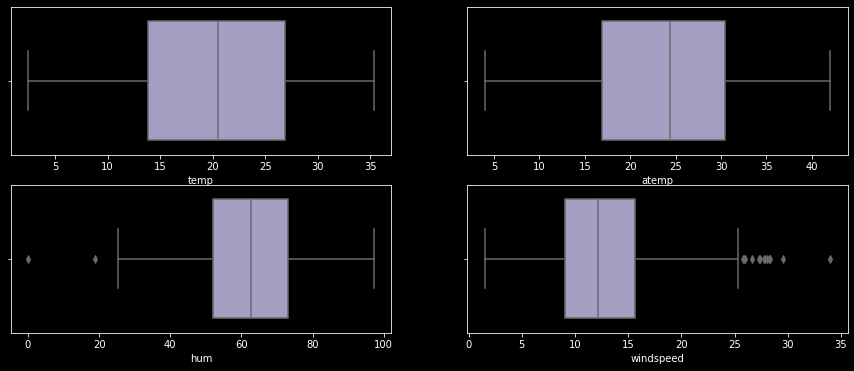

In [12]:
# Creating boxplots to check for outliers.
plt.figure(figsize = (15,6))
for x in enumerate(continuous_var):
    plt.subplot(2,2,x[0]+1)
    sns.boxplot(x = x[1], data = df, palette = 'Purples')

In [13]:
df['windspeed'].quantile([0.2,0.5,0.75,0.9,0.95,0.99])

0.20     8.388467
0.50    12.125325
0.75    15.625589
0.90    19.833997
0.95    22.999988
0.99    27.380948
Name: windspeed, dtype: float64

In [14]:
df = df.loc[df['windspeed'] < 23]

In [15]:
df['hum'].quantile([0.01,0.03,0.05,0.10,0.25])

0.01    31.393364
0.03    39.656692
0.05    41.816700
0.10    45.933300
0.25    53.041700
Name: hum, dtype: float64

In [16]:
df = df.loc[df['hum'] > 30]

In [17]:
# Percentage of data left with us after removing outliers
round(len(df.index)/730*100, 2)

94.38

##### Explanation:
The variable 'windspeed' and 'hue' had few outliers. Since the no.of ouliers were low, this outliers were dropped.

In [18]:
numeric_var = ['casual', 'registered', 'cnt']

In [19]:
df[numeric_var].describe()

,casual,registered,cnt
count,689.000000,689.000000,689.000000
mean,870.824383,3722.425254,4593.249637
std,684.302460,1536.697235,1905.144913
min,9.000000,416.000000,431.000000
25%,330.000000,2627.000000,3322.000000
50%,740.000000,3717.000000,4590.000000
75%,1138.000000,4841.000000,6043.000000
max,3410.000000,6946.000000,8714.000000


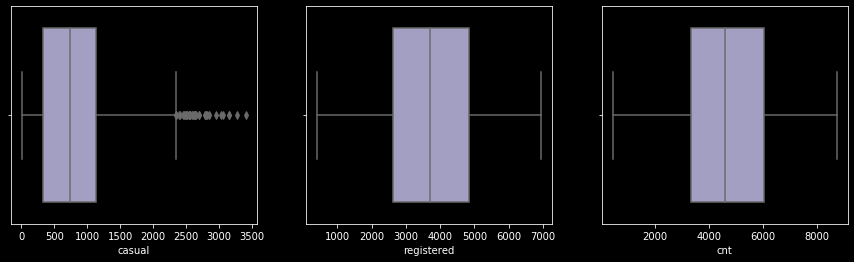

In [20]:
plt.figure(figsize = (15,4))
plt.subplot(131)
sns.boxplot(df['casual'], palette = 'Purples')
plt.subplot(132)
sns.boxplot(df['registered'], palette = 'Purples')
plt.subplot(133)
sns.boxplot(df['cnt'], palette = 'Purples')
plt.show()

In [21]:
# Checking for Correlation of variables.
df[numeric_var].corr()

,casual,registered,cnt
casual,1.000000,0.380323,0.665956
registered,0.380323,1.000000,0.943211
cnt,0.665956,0.943211,1.000000


In [22]:
# Dropping similar columns
df = df.drop(['casual', 'registered'], axis = 1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Explanation:
The variable 'casual' has outliers which has to be dealt with before preparing the model. However Since our target variable is 'cnt' which basically indclues both 'casual' and 'registered'. So we can drop this additional variables, cause it may lead to 'Target Leakage'. Also there correlation is almost 1.

- ### Subtask 2.2: Converting numeric variables into categorical variables

In [23]:
# The variables such as 'season' and 'weathersit' have numeric values which are encoded with information,
# hence assigning back the original values, for better analysis.
df['season'].replace([1,2,3,4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
df['weathersit'].replace([1,2,3,4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], inplace = True)

In [24]:
df['season'].value_counts()

Fall      184
Summer    175
Winter    172
Spring    158
Name: season, dtype: int64

In [25]:
df['weathersit'].value_counts()

Clear         437
Mist          236
Light Snow     16
Name: weathersit, dtype: int64

In [26]:
df['mnth'].value_counts()

7     62
5     62
8     61
6     59
12    58
11    58
10    58
9     58
1     56
3     54
4     53
2     50
Name: mnth, dtype: int64

##### Explanation:
The categorical variables do not have any anomalies/outliers, hence we can proceed further.  

- ### Subtask 2.3: Dropping unnecessary columns

In [27]:
df = df.drop(['instant', 'dteday'], axis = 1)

In [28]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Explanation:
The columns 'instant' and 'dteday' will not be helpfull for the analysis, hence there columns are dropped. 

## Task 3: Data Visualization
- ### Subtask 3.1: Univariate Analysis

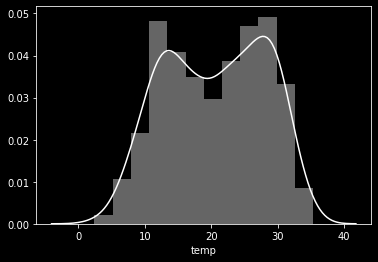

In [29]:
sns.distplot(df['temp'], color = 'w')
plt.show()

- ### Subtask 3.2: Bivariate Analysis

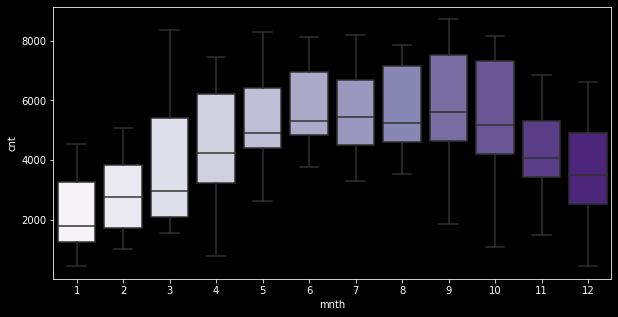

In [30]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['mnth'], y = df['cnt'], palette = 'Purples')
plt.show()

##### Explanation: 
1. The use of bikes seems to increase more from the month of May and remains significantly stable (Median value) till the month of Sep, and slowly begin to decline again.
2. This variation might be due to the effect of seasons.

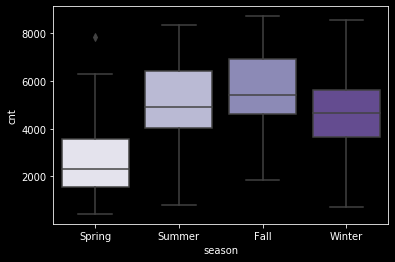

In [31]:
sns.boxplot(x = df['season'], y = df['cnt'], palette = 'Purples')
plt.show()

#### Explanation:
1. It's clear from the above graphs that season is one of important variable which influence the use of bikes.
2. The users prefer to ride bikes more in the Summer and Fall seasons.

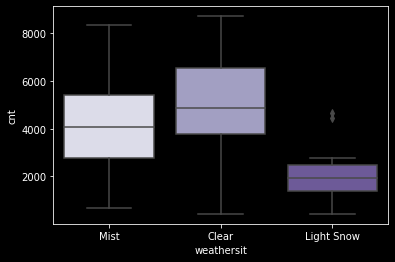

In [32]:
sns.boxplot(x = df['weathersit'], y = df['cnt'], palette = 'Purples')
plt.show()

##### Explanation:
When the weater is likely to snow, people do not prefer to use the bikes. Hence there is very low number of users.

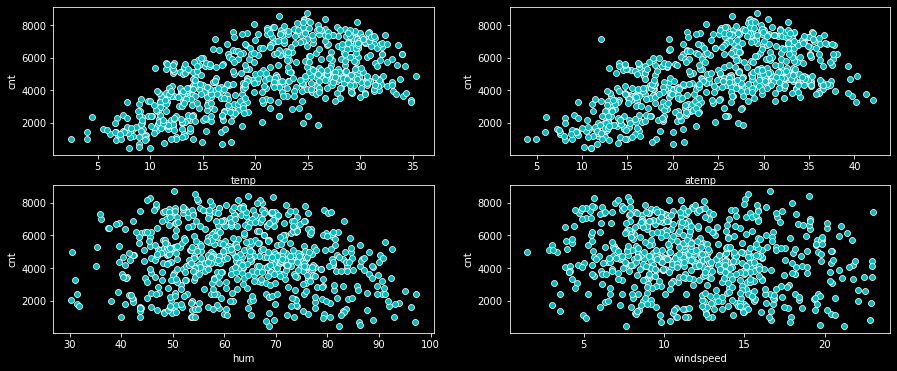

In [33]:
plt.figure(figsize = (15,6))
for x in enumerate(continuous_var):
    plt.subplot(2,2,x[0]+1)
    sns.scatterplot(x = x[1], y = 'cnt', data = df, color = 'c')
plt.show()

In [34]:
# Checking correlation between the variables 'temp' and 'atemp'
df['atemp'].corr(df['temp'])

0.9917145013259532

In [35]:
# Dropping the similar variable.
df = df.drop('temp', axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600


##### Explanation:
1. The variables 'temp' and 'atemp' have a linear relation with the target variable 'cnt'. It seems like both of this variables appear to be almost similar to each other and the correlation b/w them is 0.99 which is pretty much high. Keeping both the variable leads to Multicollinearity. Hence the variable 'temp' was dropped.
2. The variable 'atemp' was selected cause of the user psychology. (People believe/go with  what temp they feel rather than the actual temp).
3. No visible patterns found between the variables 'hum' and 'windspeed' the data sets are scattered all over.

- ### Subtask 3.3: Multivariate Analysis 

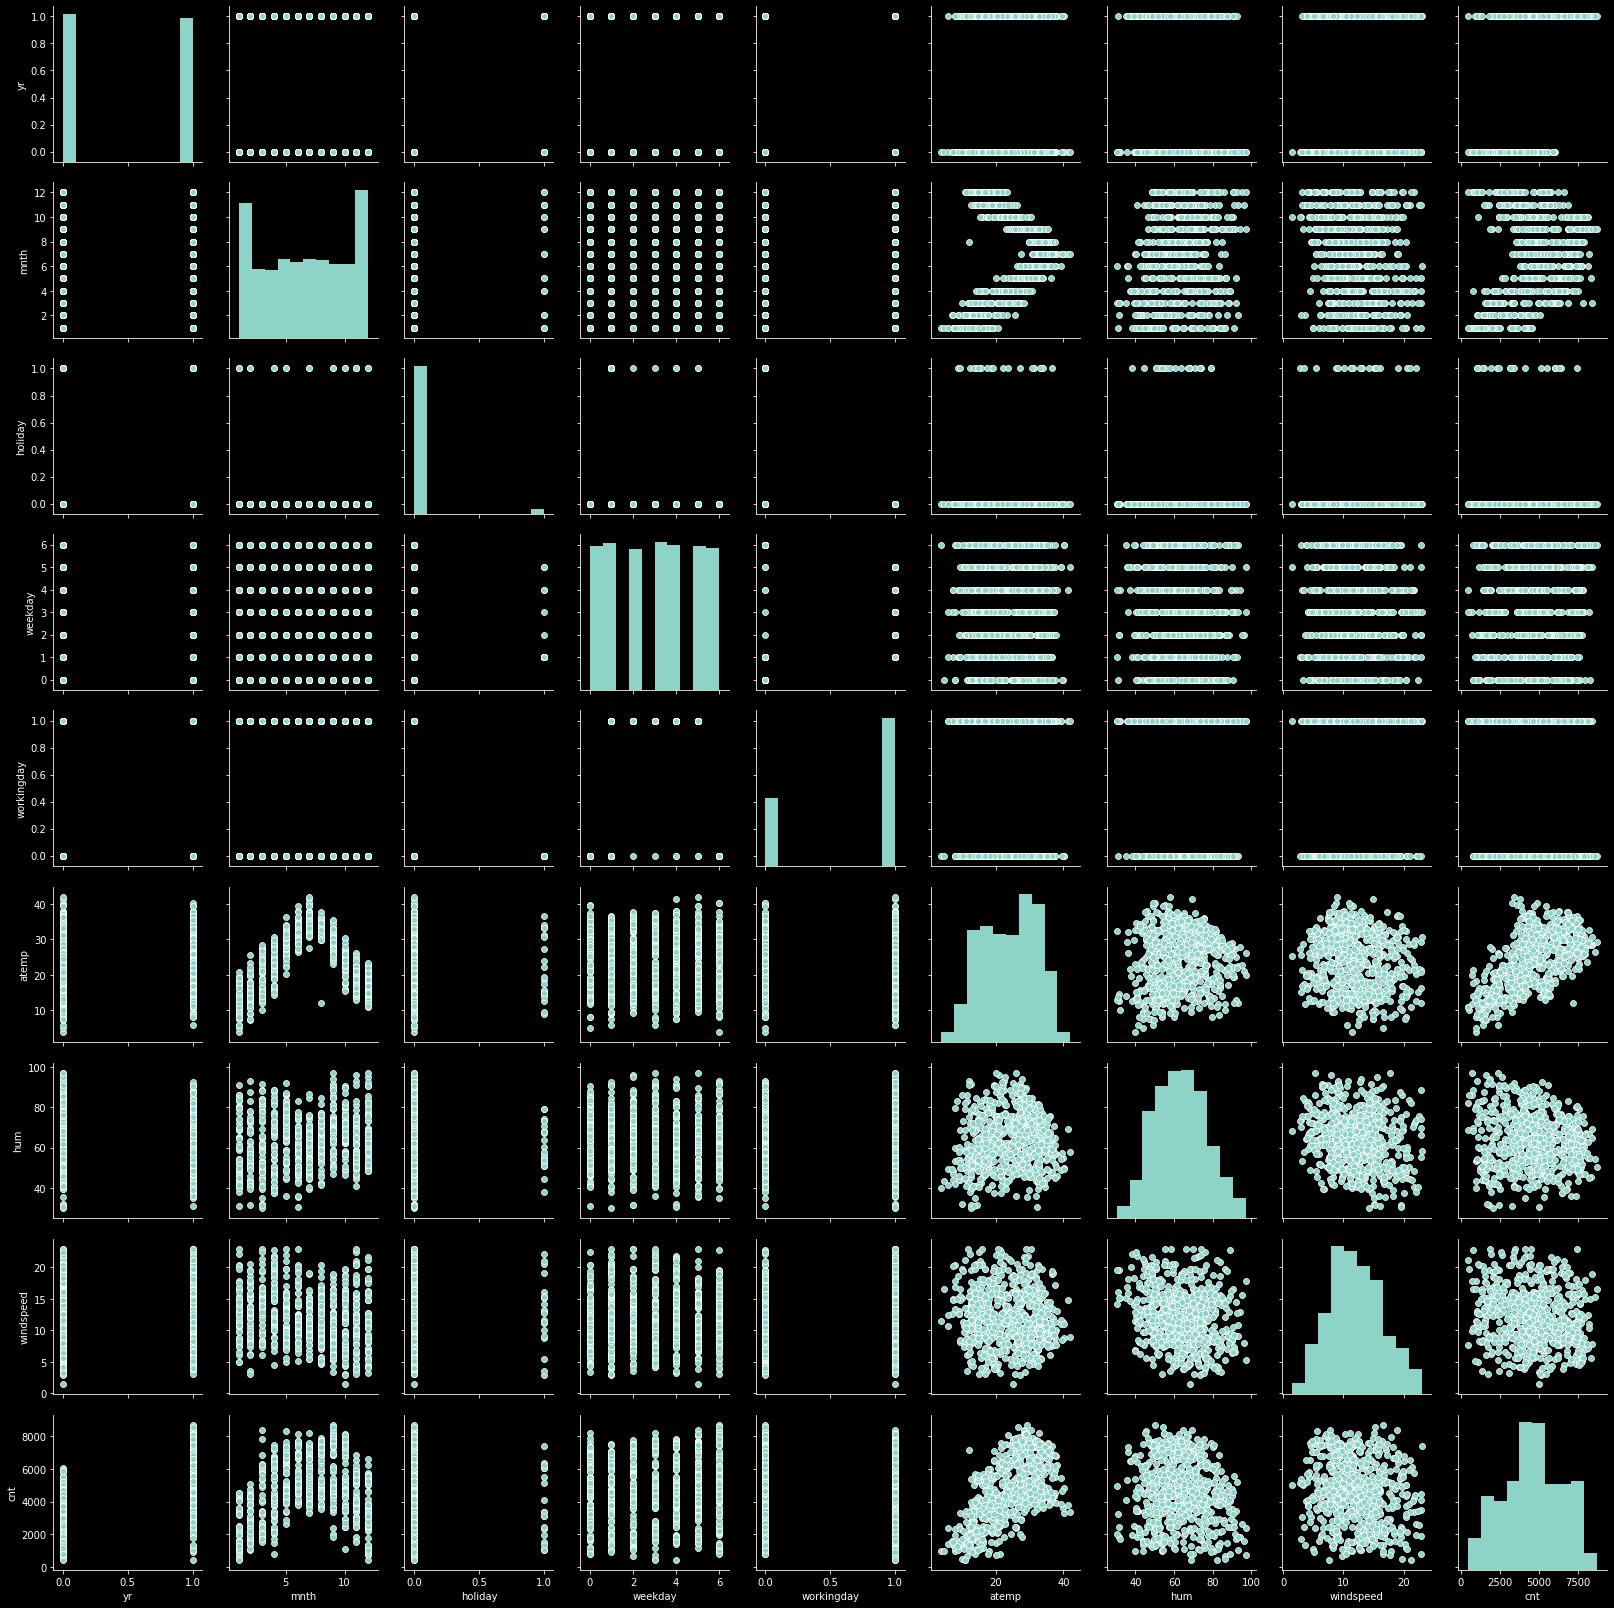

In [36]:
sns.pairplot(df)
plt.show()

##### Explanation: 
There appears to be linearity between target and few independant variables so Linear regression model can be fit.

## Multiple Linear Regression
## Task 1: Preparing the data for modelling
- ### Subtask 1.1: Creating dummy variables

In [37]:
dummy = ['season', 'weathersit']
dummy_var = pd.get_dummies(df[dummy], drop_first = True)

In [38]:
df = pd.concat([df,dummy_var], axis = 1)

In [39]:
df.drop(['season', 'weathersit'], axis = 1, inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


##### Explanation:
Dummy variables have been created for the categorical variables 'Season' and 'weathersit' and the 1st column has been dropped as for each categorical variable with n features, it just need n-1 columns.

- ### Subtask 1.2: Train and Test split

In [40]:
# Splitting the data into train and test splits
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [41]:
print(df_train.shape)
print(df_test.shape)

(482, 14)
(207, 14)


##### Explanation:
The entire df data set has been split into training and the test data in the ratio (70:30) and the whole selection process is done randomly.

- ### Subtask 1.3: Rescalling the variables

In [42]:
# Creating a list of columns which require scaling.
rescale = ['mnth', 'weekday', 'atemp', 'hum', 'windspeed', 'cnt', ]

In [43]:
# Creating an object of the class
scaler = MinMaxScaler()

In [44]:
df_train[rescale] = scaler.fit_transform(df_train[rescale])

In [45]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,0.489627,0.517918,0.022822,0.491010,0.668050,0.512211,0.504133,0.486212,0.496693,0.226141,0.244813,0.271784,0.029046,0.342324
std,0.500412,0.315947,0.149490,0.340074,0.471402,0.220468,0.209500,0.200770,0.232850,0.418766,0.430423,0.445341,0.168109,0.474980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.328592,0.338600,0.339657,0.338330,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.545455,0.000000,0.500000,1.000000,0.512771,0.493306,0.473829,0.498973,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.696759,0.655069,0.631281,0.668742,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Explanation: 
1. All the variables are rescaled to the units between 0 and 1.
2. The label encoded variables ('mnth' and 'weekday') have lost the readability after rescaling, however this step was necessary because one of our main objective is interpretation of variables.
3. The binary categorical variables are not scaled cause they are already converted into 0 and 1.

- ### Subtask 1.4: Correlation Matrix and Heatmap

In [46]:
# Creating a correlation Matrix
df_train.corr().round(2)

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
yr,1.00,0.02,0.02,0.00,0.02,0.09,-0.11,-0.00,0.61,-0.06,0.01,0.02,-0.07,-0.01
mnth,0.02,1.00,0.05,-0.01,0.01,0.21,0.18,-0.21,0.32,-0.60,-0.33,0.72,0.06,-0.05
holiday,0.02,0.05,1.00,-0.08,-0.22,0.01,0.02,-0.05,-0.05,0.02,0.01,0.00,-0.03,-0.02
weekday,0.00,-0.01,-0.08,1.00,0.00,-0.03,-0.04,0.00,0.05,0.01,-0.01,-0.00,0.04,0.04
workingday,0.02,0.01,-0.22,0.00,1.00,0.03,0.02,0.01,0.04,-0.01,-0.01,0.02,0.04,0.04
atemp,0.09,0.21,0.01,-0.03,0.03,1.00,0.10,-0.13,0.63,-0.61,0.16,-0.24,-0.06,-0.13
hum,-0.11,0.18,0.02,-0.04,0.02,0.10,1.00,-0.20,-0.14,-0.15,0.00,0.15,0.32,0.47
windspeed,-0.00,-0.21,-0.05,0.00,0.01,-0.13,-0.20,1.00,-0.15,0.13,0.15,-0.14,0.09,0.03
cnt,0.61,0.32,-0.05,0.05,0.04,0.63,-0.14,-0.15,1.00,-0.59,0.12,0.07,-0.22,-0.20
season_Spring,-0.06,-0.60,0.02,0.01,-0.01,-0.61,-0.15,0.13,-0.59,1.00,-0.31,-0.33,-0.00,0.05


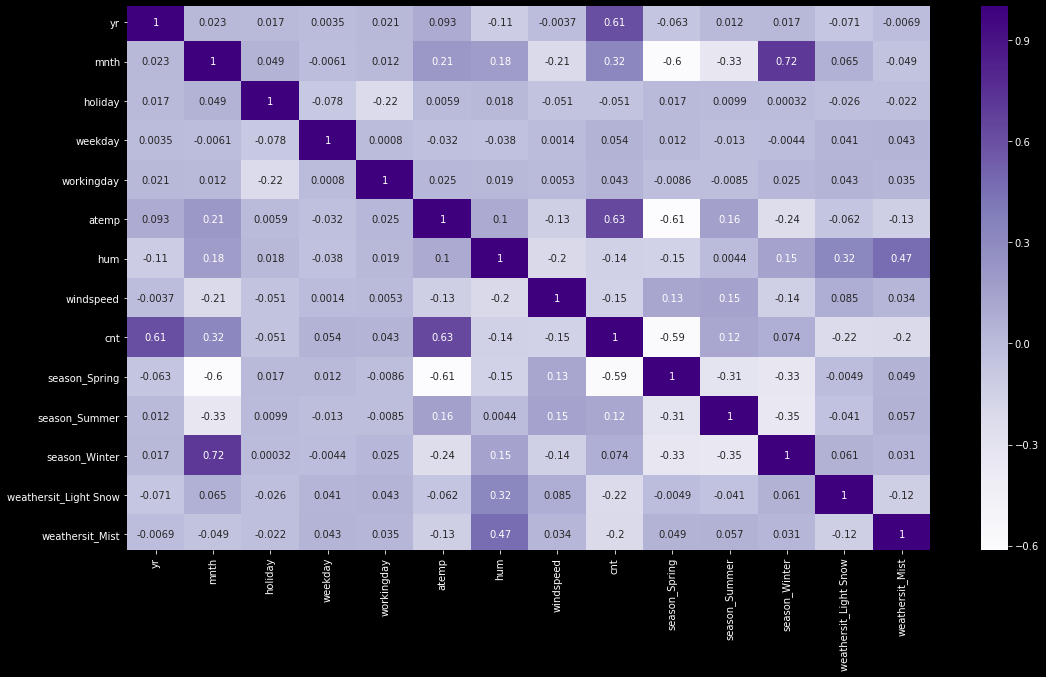

In [47]:
# Creating a Heatmap
plt.figure(figsize = (18,10))
heatmap = sns.heatmap(df_train.corr(), annot = True, cmap = 'Purples')
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom+0.40, top-0.40)
plt.show()

##### Explanation: 
1. The variables 'atemp' and 'yr' have high positive correlation to 'cnt'
2. As expected 'mnth' has a decent positive correlation, also season_Summer alone has a positive correlation of 0.12 (This backs-up the Bivariate analysis)
3. There also appears to be Multicollinearity b/w the independent variables. However this can be tested later with the help of VIF.

## Task 2: Training the model 
- ### Subtask 2.1: Assigning X and Y

In [48]:
Y_train = df_train.pop('cnt')
X_train = df_train

In [49]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
173,0,0.454545,0,0.666667,1,0.817825,0.607517,0.674418,0,0,0,0,1
713,1,1.000000,0,1.000000,0,0.329256,0.527380,0.261644,0,0,1,0,0
586,1,0.636364,0,0.833333,1,0.782238,0.626447,0.674446,0,0,0,0,1
534,1,0.454545,0,0.333333,1,0.764025,0.587325,0.391494,0,1,0,0,0
384,1,0.000000,0,0.833333,1,0.167854,0.223868,0.562061,1,0,0,0,1


- ### Subtask 2.2: Building the model using Statsmodels (Top-down method)
    -  ##### Note: Assuming alpha to be 0.05 with 95% of confidence interval
    -  ##### Note: Assuming permitable VIF level to be <5

#### Model 1: All features

In [50]:
# Adding the constant
X_train_sm = sm.add_constant(X_train)

In [51]:
# Fitting the regression model 1
lr_model = sm.OLS(Y_train, X_train_sm).fit()

In [52]:
# Checking the Stats summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     186.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.21e-175
Time:                        14:33:10   Log-Likelihood:                 457.98
No. Observations:                 482   AIC:                            -888.0
Df Residuals:                     468   BIC:                            -829.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [53]:
# Computation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, x) for x in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,atemp,12.77
6,hum,12.71
1,mnth,12.67
7,windspeed,6.78
10,season_Winter,4.55
4,workingday,3.15
8,season_Spring,3.13
3,weekday,3.00
12,weathersit_Mist,2.51
9,season_Summer,2.30


##### Explanation:
- The feature 'mnth' has P-value 0.77 [> 0.05] which is very high.
- Since it fails to reject null hypothesis the feature is insignificant.
- Also it has a VIF of 12.67 which is very high. (Multicollinearity)
- Hence this feature has to be dropped.

#### Model 2: Excluding feature 'mnth'

In [54]:
X2 = X_train.drop('mnth', axis = 1)

In [55]:
X2_sm = sm.add_constant(X2)
lr_model_2 = sm.OLS(Y_train, X2_sm).fit()

In [56]:
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.68e-177
Time:                        14:33:12   Log-Likelihood:                 457.94
No. Observations:                 482   AIC:                            -889.9
Df Residuals:                     469   BIC:                            -835.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [57]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, x) for x in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,12.15
4,atemp,10.55
6,windspeed,6.56
3,workingday,3.13
2,weekday,2.96
7,season_Spring,2.90
9,season_Winter,2.57
11,weathersit_Mist,2.49
8,season_Summer,2.08
0,yr,2.02


##### Explanation: 
- Notice that R^2 and Adj.R^2 haven't reduced at all. Hence proves the feature 'mnth' was insinificant.
- The feature 'workingday' has P-value 0.38 [>0.05] which is high.
- Since it fails to reject null hypothesis the feature is insignificant.
- Even though the other features have higher VIF, 'Workingday' should me removed cause it's insignificant and once this variable is dropped, the VIF of other variables might decrease.

#### Model 3: Excluding features ['mnth', 'workingday']

In [58]:
X3 = X2.drop('workingday', axis = 1)

In [59]:
X3.head()

,yr,holiday,weekday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
173,0,0,0.666667,0.817825,0.607517,0.674418,0,0,0,0,1
713,1,0,1.000000,0.329256,0.527380,0.261644,0,0,1,0,0
586,1,0,0.833333,0.782238,0.626447,0.674446,0,0,0,0,1
534,1,0,0.333333,0.764025,0.587325,0.391494,0,1,0,0,0
384,1,0,0.833333,0.167854,0.223868,0.562061,1,0,0,0,1


In [60]:
X3_sm = sm.add_constant(X3)
lr_model_3 = sm.OLS(Y_train, X3_sm).fit()

In [61]:
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.35e-178
Time:                        14:33:14   Log-Likelihood:                 457.55
No. Observations:                 482   AIC:                            -891.1
Df Residuals:                     470   BIC:                            -841.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [62]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, x) for x in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,12.15
3,atemp,9.87
5,windspeed,6.54
2,weekday,2.96
6,season_Spring,2.75
10,weathersit_Mist,2.48
8,season_Winter,2.47
7,season_Summer,2.05
0,yr,2.01
9,weathersit_Light Snow,1.41


##### Explanation: 
- Notice that R^2 and Adj.R^2 haven't reduced at all. Hence proves the features ['mnth', 'workingday'] was insinificant.
- The feature 'season_Summer' has P-value 0.347 [>0.05] which is high.
- Since it fails to reject null hypothesis the feature is insignificant.
- Even though the other features have higher VIF, 'season_Summer' should me removed cause it's insignificant and once this variable is dropped, the VIF of other variables might decrease.

#### Model 4: Excluding features ['mnth', 'workingday', 'season_Summer']

In [63]:
X4 = X3.drop('season_Summer', axis = 1)

In [64]:
X4_sm = sm.add_constant(X4)
lr_model_4 = sm.OLS(Y_train, X4_sm).fit()

In [65]:
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.11e-179
Time:                        14:33:15   Log-Likelihood:                 457.09
No. Observations:                 482   AIC:                            -892.2
Df Residuals:                     471   BIC:                            -846.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [66]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, x) for x in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,11.23
3,atemp,9.45
5,windspeed,5.43
2,weekday,2.92
9,weathersit_Mist,2.48
6,season_Spring,2.09
0,yr,1.99
7,season_Winter,1.84
8,weathersit_Light Snow,1.37
1,holiday,1.03


##### Explanation: 
- The P-value of all the features are below 0.05, which means that all the variables are significant. However The VIF of few features are still very high [>5] which means there exists multicollinearity between the variables and few features have to be dropped.
- The feature 'windspeed' is significant but when compared with other features it is less significant. Hence this variable has to be dropped to reduce the multicollinearity.

#### Model 5: Excluding features ['mnth', 'workingday', 'season_Summer', 'windspeed']

In [67]:
X5 = X4.drop('windspeed', axis = 1)

In [68]:
X5_sm = sm.add_constant(X5)
lr_model_5 = sm.OLS(Y_train, X5_sm).fit()

In [69]:
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     266.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          7.59e-179
Time:                        14:33:17   Log-Likelihood:                 454.26
No. Observations:                 482   AIC:                            -888.5
Df Residuals:                     472   BIC:                            -846.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [70]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, x) for x in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,11.18
3,atemp,7.32
2,weekday,2.87
8,weathersit_Mist,2.42
0,yr,1.98
6,season_Winter,1.74
5,season_Spring,1.64
7,weathersit_Light Snow,1.35
1,holiday,1.03


##### Explanation: 
The feature 'hum' is significant, however it has a VIF of 11.18 [>10] which is very high. Hence this feature has to be dropped.

#### Model 6: Excluding features ['mnth', 'workingday', 'season_Summer', 'windspeed', 'hum']

In [71]:
X6 = X5.drop('hum', axis = 1)

In [72]:
X6_sm = sm.add_constant(X6)
lr_model_6 = sm.OLS(Y_train, X6_sm).fit()

In [73]:
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     295.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.15e-178
Time:                        14:33:19   Log-Likelihood:                 450.89
No. Observations:                 482   AIC:                            -883.8
Df Residuals:                     473   BIC:                            -846.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [74]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, x) for x in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,atemp,3.05
2,weekday,2.87
0,yr,1.96
7,weathersit_Mist,1.50
5,season_Winter,1.38
4,season_Spring,1.36
6,weathersit_Light Snow,1.05
1,holiday,1.03


##### Explanation: Final Model (lr_model_6)
- All the features are significant.
- The features do not have multicollinearity.
- The model has R^2 of 0.833 which is pretty high. (About 80% of variance in 'cnt' is being explained by the other variables).
- The model has Adj.R^2 of 0.831. (The model is able to predict the target variable with least no.of independent variables).
- The Prob (F-statistic) is 1.15e-178. which is almost equal to 0, (<0.05) hence proves that the overall model is significant and the best fit line is not occurance by chance.
- The features 'atemp' and 'yr' have the highest positive coef. These features are likely to impart the 'cnt' variable more. These variables not only have correlation but also have causation, because temperature is one of the key feature which influence riding. Also the reputation of the company would have increased over years, hence the users prefer 'BoomBikes'.  
- The features 'weathersit_Light Snow' and 'season_Spring' have the highest negative coef. These features have negative impact on the target variable 'cnt'. Again this backs-up the analysis made in bivariate analysis.

## Task 3: Residual Analysis
- ### Subtask 3.1: Computation of Residual

In [75]:
# Calculation of Y predicted.
Y_train_pred = lr_model_6.predict(X6_sm)

In [76]:
residual = Y_train - Y_train_pred

- ### Subtask 3.2: Assumptions check.

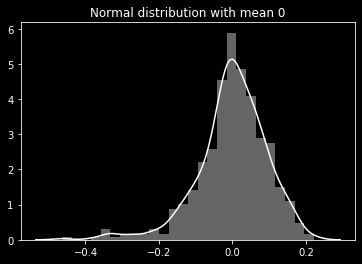

In [77]:
sns.distplot(residual, color = 'w')
plt.title('Normal distribution with mean 0')
plt.show()

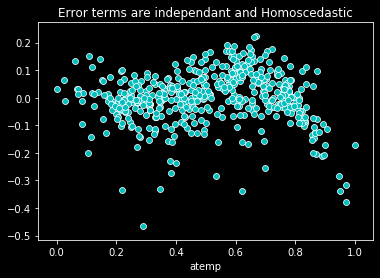

In [78]:
sns.scatterplot(x = X_train.atemp, y = residual, color = 'c')
plt.title('Error terms are independant and Homoscedastic')
plt.show()

## Task 4: Testing the model
- ### Subtask 4.1: Rescaling the test data

In [79]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
163,0,6,0,1,1,30.08270,49.4583,20.458450,5020,0,1,0,0,0
204,0,7,0,0,0,39.74145,55.0833,11.334457,3606,0,0,0,0,0
281,0,10,0,0,0,26.19915,72.7500,4.251150,5511,0,0,1,0,0
120,0,5,0,0,0,22.41020,76.2083,7.125718,3351,0,1,0,0,1
26,0,1,0,4,1,10.98500,68.7500,7.627079,431,1,0,0,0,0


In [80]:
df_test[rescale] = scaler.transform(df_test[rescale])

In [81]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow,weathersit_Mist
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.497585,0.490558,0.048309,0.517713,0.729469,0.556078,0.498776,0.504427,0.514037,0.236715,0.275362,0.198068,0.009662,0.342995
std,0.501206,0.295566,0.214939,0.314959,0.445311,0.226682,0.188918,0.212003,0.224283,0.426096,0.447780,0.399510,0.098056,0.475861
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.027173,0.018162,0.087219,-0.001209,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.250000,0.000000,0.353542,0.362373,0.348849,0.372900,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.606935,0.510343,0.474828,0.516862,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.741013,0.645062,0.642820,0.702768,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.019965,1.015144,0.998093,0.957452,1.000000,1.000000,1.000000,1.000000,1.000000


##### Explanation:
The min and max values are not 0 and 1 for few variables because the scalling is done based on the scaler which was fit on the train data.

- ### Subtask 4.2: Dropping columns to match test data with train data 

In [82]:
Y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
X_test = X_test.drop(['mnth', 'workingday', 'season_Summer', 'windspeed', 'hum'], axis =1)

In [84]:
X_test.head()

,yr,holiday,weekday,atemp,season_Spring,season_Winter,weathersit_Light Snow,weathersit_Mist
163,0,0,0.166667,0.691124,0,0,0,0
204,0,0,0.000000,0.956645,0,0,0,0
281,0,0,0.000000,0.584365,0,1,0,0
120,0,0,0.000000,0.480206,0,0,0,1
26,0,0,0.666667,0.166125,1,0,0,0


- ### Subtask 4.3: Prediction and Evaluation

In [85]:
# Model Prediction
X_test_sm = sm.add_constant(X_test)
Y_test_pred = lr_model_6.predict(X_test_sm)

In [86]:
# Model Evaluation
print(r2_score(y_true = Y_test, y_pred = Y_test_pred).round(3))

0.796


##### Explanation:
The r2_score refers to R squared, when the prediction was made using the final model (lr_model_6) we have got a R squared value of 0.796 which is pretty much closer to the R squared of training data (< 5% change). Hence proves that the model is effective and is a good predictor of the target variable 'cnt'

#### Interpretation:
- Features which negatively impact the target variable:
    - 'weathersit_Light Snow' and 'season_Spring' 
- Features which has positive impact on the target variable:
    - 'atemp' and 'yr'

#### Key insights:
- People use the bike services more often during the summer and fall seasons. Also when the weather is clear.
- Advertising strategies are required to increase the number of use of bikes during the Spring season.
- People dont seem to use bike services during holidays. Which means they might use it as a means of commute during working days.